#Reconocimiento de potenciales adultos autistas

##Data Science BEDU - Equipo 4

###Integrantes:
* Juan Manuel Ledesma Rangel.
* Hannia Melendres Samaniego.
* Alejandro Cortez Sánchez.
* Martin Otamendi Torres.

###Descripción: **(Agregar más)**
Uso de un algoritmo genético para perfeccionar los hiperparámetros de una red neuronal que reconocerá a potenciales adultos con autismo.

---



#Procesamiento de Datos
Primero importamos el dataset y lo convertimos de Arff a un dataframe

In [2]:
import pandas as pd
import numpy as np
from scipy.io.arff import loadarff 
from pandas.core.strings.accessor import is_object_dtype

raw_data = loadarff('/content/Autism-Adult-Data.arff')
df = pd.DataFrame(raw_data[0])
df

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,b'1',b'1',b'1',b'1',b'0',b'0',b'1',b'1',b'0',b'0',...,b'f',b'White-European',b'no',b'no',b'United States',b'no',6.0,b'18 and more',b'Self',b'NO'
1,b'1',b'1',b'0',b'1',b'0',b'0',b'0',b'1',b'0',b'1',...,b'm',b'Latino',b'no',b'yes',b'Brazil',b'no',5.0,b'18 and more',b'Self',b'NO'
2,b'1',b'1',b'0',b'1',b'1',b'0',b'1',b'1',b'1',b'1',...,b'm',b'Latino',b'yes',b'yes',b'Spain',b'no',8.0,b'18 and more',b'Parent',b'YES'
3,b'1',b'1',b'0',b'1',b'0',b'0',b'1',b'1',b'0',b'1',...,b'f',b'White-European',b'no',b'yes',b'United States',b'no',6.0,b'18 and more',b'Self',b'NO'
4,b'1',b'0',b'0',b'0',b'0',b'0',b'0',b'1',b'0',b'0',...,b'f',b'?',b'no',b'no',b'Egypt',b'no',2.0,b'18 and more',b'?',b'NO'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699,b'0',b'1',b'0',b'1',b'1',b'0',b'1',b'1',b'1',b'1',...,b'f',b'White-European',b'no',b'no',b'Russia',b'no',7.0,b'18 and more',b'Self',b'YES'
700,b'1',b'0',b'0',b'0',b'0',b'0',b'0',b'1',b'0',b'1',...,b'm',b'Hispanic',b'no',b'no',b'Mexico',b'no',3.0,b'18 and more',b'Parent',b'NO'
701,b'1',b'0',b'1',b'1',b'1',b'0',b'1',b'1',b'0',b'1',...,b'f',b'?',b'no',b'no',b'Russia',b'no',7.0,b'18 and more',b'?',b'YES'
702,b'1',b'0',b'0',b'1',b'1',b'0',b'1',b'0',b'1',b'1',...,b'm',b'South Asian',b'no',b'no',b'Pakistan',b'no',6.0,b'18 and more',b'Self',b'NO'


Revisamos el contenido y observamos que el dataframe tiene una b al inicio de todos los elementos de las columnas que tienen el tipo object. Esto indica que son bytes y es un problema de encoding. 

In [3]:
df.dtypes

A1_Score            object
A2_Score            object
A3_Score            object
A4_Score            object
A5_Score            object
A6_Score            object
A7_Score            object
A8_Score            object
A9_Score            object
A10_Score           object
age                float64
gender              object
ethnicity           object
jundice             object
austim              object
contry_of_res       object
used_app_before     object
result             float64
age_desc            object
relation            object
Class/ASD           object
dtype: object

Para arreglarlo creamos una función que nos permitirá remplazar de las columnas de objeto esta b con comillas. 

In [4]:
def remove_b_arff(serie):
  global df
  if is_object_dtype(serie):
    df[serie.name] = serie.str.decode('utf-8')

Lo aplicamos a todo nuestro dataframe

In [5]:
df.apply(remove_b_arff, axis = 0)
df

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,...,f,White-European,no,no,United States,no,6.0,18 and more,Self,NO
1,1,1,0,1,0,0,0,1,0,1,...,m,Latino,no,yes,Brazil,no,5.0,18 and more,Self,NO
2,1,1,0,1,1,0,1,1,1,1,...,m,Latino,yes,yes,Spain,no,8.0,18 and more,Parent,YES
3,1,1,0,1,0,0,1,1,0,1,...,f,White-European,no,yes,United States,no,6.0,18 and more,Self,NO
4,1,0,0,0,0,0,0,1,0,0,...,f,?,no,no,Egypt,no,2.0,18 and more,?,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699,0,1,0,1,1,0,1,1,1,1,...,f,White-European,no,no,Russia,no,7.0,18 and more,Self,YES
700,1,0,0,0,0,0,0,1,0,1,...,m,Hispanic,no,no,Mexico,no,3.0,18 and more,Parent,NO
701,1,0,1,1,1,0,1,1,0,1,...,f,?,no,no,Russia,no,7.0,18 and more,?,YES
702,1,0,0,1,1,0,1,0,1,1,...,m,South Asian,no,no,Pakistan,no,6.0,18 and more,Self,NO


Ahora, proseguimos a revisar si existen NaNs.

In [6]:
df.isna().sum(axis=0)

A1_Score           0
A2_Score           0
A3_Score           0
A4_Score           0
A5_Score           0
A6_Score           0
A7_Score           0
A8_Score           0
A9_Score           0
A10_Score          0
age                2
gender             0
ethnicity          0
jundice            0
austim             0
contry_of_res      0
used_app_before    0
result             0
age_desc           0
relation           0
Class/ASD          0
dtype: int64

Podemos observar que existen dos NaNs en la columna age que es de tipo float. Sin embargo observando el dataset, vemos que también existen signos de interrogación en las columnas de tipo object. Por lo que habrá que remplazarlos ambos. 

En el caso de la columa age, podemos replazar los NaNs con el promedio de la columna. 

In [7]:
age_mean = df['age'].mean()
age_mean

29.698005698005698

In [8]:
df['age'] = df['age'].fillna(age_mean)
df.isna().sum(axis = 0)

A1_Score           0
A2_Score           0
A3_Score           0
A4_Score           0
A5_Score           0
A6_Score           0
A7_Score           0
A8_Score           0
A9_Score           0
A10_Score          0
age                0
gender             0
ethnicity          0
jundice            0
austim             0
contry_of_res      0
used_app_before    0
result             0
age_desc           0
relation           0
Class/ASD          0
dtype: int64

Para las columnas tipo object primero localizamos cuales son las que tienen estos signos de interrogación.

In [9]:
columns_with_question_mark = pd.Series(int)

def find_question_marks(serie):
  global columns_with_question_mark
  if is_object_dtype(serie):
    if len(list(serie.str.find('?').value_counts().index)) > 1:
      num_quesion_marks = serie.str.find('?').value_counts().values[1]
      columns_with_question_mark[serie.name] = num_quesion_marks

In [10]:
df.apply(find_question_marks, axis=0)
columns_with_question_mark
list_columns_with_question_mark = list(columns_with_question_mark.index)

In [11]:
list_columns_with_question_mark.pop(0)
list_columns_with_question_mark

['ethnicity', 'relation']

Y ahora, creamos una función para poder remplazar estos signos de interrogación con la moda de la columna. 

In [12]:
import statistics

def fill_question_mark_with_mode(serie, list_to_replace):
  global df
  if serie.name in list_to_replace:
    mode_s = statistics.mode(serie)
    df[serie.name] = serie.replace('?', mode_s)

In [13]:
df.apply(fill_question_mark_with_mode, list_to_replace=list_columns_with_question_mark, axis=0);

Volvemos a validar con nuestra función para ver si siguen existiendo columnas con signos de interrogación. Y vemos que ya no existe ninguna. 

In [14]:
columns_with_question_mark = pd.Series(int)

df.apply(find_question_marks, axis=0)
columns_with_question_mark

0    <class 'int'>
dtype: object

Si entramos al dataframe veremos que antes en la fila número 4 había un signo de interrogación en ethnicity y ahora dice White-European que es la moda. De igual modo en la columna relation de la misma fila ahora dice Self en lugar de el signo de interrogación. 

In [15]:
df

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,...,f,White-European,no,no,United States,no,6.0,18 and more,Self,NO
1,1,1,0,1,0,0,0,1,0,1,...,m,Latino,no,yes,Brazil,no,5.0,18 and more,Self,NO
2,1,1,0,1,1,0,1,1,1,1,...,m,Latino,yes,yes,Spain,no,8.0,18 and more,Parent,YES
3,1,1,0,1,0,0,1,1,0,1,...,f,White-European,no,yes,United States,no,6.0,18 and more,Self,NO
4,1,0,0,0,0,0,0,1,0,0,...,f,White-European,no,no,Egypt,no,2.0,18 and more,Self,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699,0,1,0,1,1,0,1,1,1,1,...,f,White-European,no,no,Russia,no,7.0,18 and more,Self,YES
700,1,0,0,0,0,0,0,1,0,1,...,m,Hispanic,no,no,Mexico,no,3.0,18 and more,Parent,NO
701,1,0,1,1,1,0,1,1,0,1,...,f,White-European,no,no,Russia,no,7.0,18 and more,Self,YES
702,1,0,0,1,1,0,1,0,1,1,...,m,South Asian,no,no,Pakistan,no,6.0,18 and more,Self,NO


Observando nuevamente el dataset detectamos que la columna age_desc no agrega ningún valor a nuestro análisis ya que sólo repite la frase "18 and more" en cada fila. Por lo que la eliminaremos.

In [16]:
df['age_desc'].value_counts()

18 and more    704
Name: age_desc, dtype: int64

In [17]:
df.drop(columns='age_desc', inplace = True)

In [18]:
df

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,26.0,f,White-European,no,no,United States,no,6.0,Self,NO
1,1,1,0,1,0,0,0,1,0,1,24.0,m,Latino,no,yes,Brazil,no,5.0,Self,NO
2,1,1,0,1,1,0,1,1,1,1,27.0,m,Latino,yes,yes,Spain,no,8.0,Parent,YES
3,1,1,0,1,0,0,1,1,0,1,35.0,f,White-European,no,yes,United States,no,6.0,Self,NO
4,1,0,0,0,0,0,0,1,0,0,40.0,f,White-European,no,no,Egypt,no,2.0,Self,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699,0,1,0,1,1,0,1,1,1,1,25.0,f,White-European,no,no,Russia,no,7.0,Self,YES
700,1,0,0,0,0,0,0,1,0,1,34.0,m,Hispanic,no,no,Mexico,no,3.0,Parent,NO
701,1,0,1,1,1,0,1,1,0,1,24.0,f,White-European,no,no,Russia,no,7.0,Self,YES
702,1,0,0,1,1,0,1,0,1,1,35.0,m,South Asian,no,no,Pakistan,no,6.0,Self,NO


Para poder usar nuestros datos en una red neuronal es recomendable convertirlos de string (object) a valores numéricos. Por lo que iniciaremos convirtiendo las variables dicotómicas en 1 y 0 respectivamente. 

In [19]:
#Comenzamos con gender
df['gender'].value_counts()

m    367
f    337
Name: gender, dtype: int64

In [20]:
df['gender'].replace(['f','m'],[0,1],inplace=True)
df

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,26.0,0,White-European,no,no,United States,no,6.0,Self,NO
1,1,1,0,1,0,0,0,1,0,1,24.0,1,Latino,no,yes,Brazil,no,5.0,Self,NO
2,1,1,0,1,1,0,1,1,1,1,27.0,1,Latino,yes,yes,Spain,no,8.0,Parent,YES
3,1,1,0,1,0,0,1,1,0,1,35.0,0,White-European,no,yes,United States,no,6.0,Self,NO
4,1,0,0,0,0,0,0,1,0,0,40.0,0,White-European,no,no,Egypt,no,2.0,Self,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699,0,1,0,1,1,0,1,1,1,1,25.0,0,White-European,no,no,Russia,no,7.0,Self,YES
700,1,0,0,0,0,0,0,1,0,1,34.0,1,Hispanic,no,no,Mexico,no,3.0,Parent,NO
701,1,0,1,1,1,0,1,1,0,1,24.0,0,White-European,no,no,Russia,no,7.0,Self,YES
702,1,0,0,1,1,0,1,0,1,1,35.0,1,South Asian,no,no,Pakistan,no,6.0,Self,NO


In [21]:
#Continuamos con jundice
df['jundice'].value_counts()

no     635
yes     69
Name: jundice, dtype: int64

In [22]:
df['jundice'].replace(['no','yes'],[0,1],inplace=True)
df

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,26.0,0,White-European,0,no,United States,no,6.0,Self,NO
1,1,1,0,1,0,0,0,1,0,1,24.0,1,Latino,0,yes,Brazil,no,5.0,Self,NO
2,1,1,0,1,1,0,1,1,1,1,27.0,1,Latino,1,yes,Spain,no,8.0,Parent,YES
3,1,1,0,1,0,0,1,1,0,1,35.0,0,White-European,0,yes,United States,no,6.0,Self,NO
4,1,0,0,0,0,0,0,1,0,0,40.0,0,White-European,0,no,Egypt,no,2.0,Self,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699,0,1,0,1,1,0,1,1,1,1,25.0,0,White-European,0,no,Russia,no,7.0,Self,YES
700,1,0,0,0,0,0,0,1,0,1,34.0,1,Hispanic,0,no,Mexico,no,3.0,Parent,NO
701,1,0,1,1,1,0,1,1,0,1,24.0,0,White-European,0,no,Russia,no,7.0,Self,YES
702,1,0,0,1,1,0,1,0,1,1,35.0,1,South Asian,0,no,Pakistan,no,6.0,Self,NO


In [23]:
#Ahora con austim
df['austim'].value_counts()

no     613
yes     91
Name: austim, dtype: int64

In [24]:
df['austim'].replace(['no','yes'],[0,1],inplace=True)
df

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,26.0,0,White-European,0,0,United States,no,6.0,Self,NO
1,1,1,0,1,0,0,0,1,0,1,24.0,1,Latino,0,1,Brazil,no,5.0,Self,NO
2,1,1,0,1,1,0,1,1,1,1,27.0,1,Latino,1,1,Spain,no,8.0,Parent,YES
3,1,1,0,1,0,0,1,1,0,1,35.0,0,White-European,0,1,United States,no,6.0,Self,NO
4,1,0,0,0,0,0,0,1,0,0,40.0,0,White-European,0,0,Egypt,no,2.0,Self,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699,0,1,0,1,1,0,1,1,1,1,25.0,0,White-European,0,0,Russia,no,7.0,Self,YES
700,1,0,0,0,0,0,0,1,0,1,34.0,1,Hispanic,0,0,Mexico,no,3.0,Parent,NO
701,1,0,1,1,1,0,1,1,0,1,24.0,0,White-European,0,0,Russia,no,7.0,Self,YES
702,1,0,0,1,1,0,1,0,1,1,35.0,1,South Asian,0,0,Pakistan,no,6.0,Self,NO


In [25]:
#Ahora con used_app_before
df['used_app_before'].value_counts()

no     692
yes     12
Name: used_app_before, dtype: int64

In [26]:
df['used_app_before'].replace(['no','yes'],[0,1],inplace=True)
df

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,26.0,0,White-European,0,0,United States,0,6.0,Self,NO
1,1,1,0,1,0,0,0,1,0,1,24.0,1,Latino,0,1,Brazil,0,5.0,Self,NO
2,1,1,0,1,1,0,1,1,1,1,27.0,1,Latino,1,1,Spain,0,8.0,Parent,YES
3,1,1,0,1,0,0,1,1,0,1,35.0,0,White-European,0,1,United States,0,6.0,Self,NO
4,1,0,0,0,0,0,0,1,0,0,40.0,0,White-European,0,0,Egypt,0,2.0,Self,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699,0,1,0,1,1,0,1,1,1,1,25.0,0,White-European,0,0,Russia,0,7.0,Self,YES
700,1,0,0,0,0,0,0,1,0,1,34.0,1,Hispanic,0,0,Mexico,0,3.0,Parent,NO
701,1,0,1,1,1,0,1,1,0,1,24.0,0,White-European,0,0,Russia,0,7.0,Self,YES
702,1,0,0,1,1,0,1,0,1,1,35.0,1,South Asian,0,0,Pakistan,0,6.0,Self,NO


In [27]:
#Ahora con Class/ASD
df['Class/ASD'].value_counts()

NO     515
YES    189
Name: Class/ASD, dtype: int64

In [28]:
#Ahora con Class/ASD
df['Class/ASD'].replace(['NO','YES'],[0,1],inplace=True)
df

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,26.0,0,White-European,0,0,United States,0,6.0,Self,0
1,1,1,0,1,0,0,0,1,0,1,24.0,1,Latino,0,1,Brazil,0,5.0,Self,0
2,1,1,0,1,1,0,1,1,1,1,27.0,1,Latino,1,1,Spain,0,8.0,Parent,1
3,1,1,0,1,0,0,1,1,0,1,35.0,0,White-European,0,1,United States,0,6.0,Self,0
4,1,0,0,0,0,0,0,1,0,0,40.0,0,White-European,0,0,Egypt,0,2.0,Self,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699,0,1,0,1,1,0,1,1,1,1,25.0,0,White-European,0,0,Russia,0,7.0,Self,1
700,1,0,0,0,0,0,0,1,0,1,34.0,1,Hispanic,0,0,Mexico,0,3.0,Parent,0
701,1,0,1,1,1,0,1,1,0,1,24.0,0,White-European,0,0,Russia,0,7.0,Self,1
702,1,0,0,1,1,0,1,0,1,1,35.0,1,South Asian,0,0,Pakistan,0,6.0,Self,0


Ahora, continuaremos con las variables categóricas que tienen más de 2 categorías. En este caso son 3: ethnicity, country_of_res y relation. Como podemos ver abajo

In [29]:
df['ethnicity'].value_counts()

White-European     328
Asian              123
Middle Eastern      92
Black               43
South Asian         36
Others              30
Latino              20
Hispanic            13
Pasifika            12
Turkish              6
others               1
Name: ethnicity, dtype: int64

Pero nos damos cuenta que hay dos *others*, sólo que uno con mayúscula la letra O y otra con minúscula. Cambiaremos la que tiene letra minúscula por mayúscula para agruparlos a ambos. 

In [30]:
df['ethnicity'].replace('others', 'Others', inplace=True)

In [31]:
df['ethnicity'].value_counts()

White-European     328
Asian              123
Middle Eastern      92
Black               43
South Asian         36
Others              31
Latino              20
Hispanic            13
Pasifika            12
Turkish              6
Name: ethnicity, dtype: int64

In [32]:
#Mapeamos ethnicity
eth_list = list(df['ethnicity'].value_counts().index)

In [33]:
eth_rep_list = list(range(0, len(eth_list)))
eth_rep_list

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [34]:
df['ethnicity'].replace(eth_list,eth_rep_list,inplace=True)

In [35]:
df['ethnicity'].value_counts()

0    328
1    123
2     92
3     43
4     36
5     31
6     20
7     13
8     12
9      6
Name: ethnicity, dtype: int64

In [36]:
df['contry_of_res'].value_counts()

United States           113
United Arab Emirates     82
New Zealand              81
India                    81
United Kingdom           77
                       ... 
China                     1
Chile                     1
Lebanon                   1
Burundi                   1
Cyprus                    1
Name: contry_of_res, Length: 67, dtype: int64

In [37]:
#Mapeamos contry_of_res
country_list = list(df['contry_of_res'].value_counts().index)
country_list

['United States',
 'United Arab Emirates',
 'New Zealand',
 'India',
 'United Kingdom',
 'Jordan',
 'Australia',
 'Canada',
 'Sri Lanka',
 'Afghanistan',
 'France',
 'Netherlands',
 'Brazil',
 'Mexico',
 'Russia',
 'Iran',
 'Ireland',
 'Malaysia',
 'Viet Nam',
 'Italy',
 'Germany',
 'Austria',
 'Philippines',
 'Saudi Arabia',
 'Kazakhstan',
 'Belgium',
 'Romania',
 'Spain',
 'Bangladesh',
 'Pakistan',
 'Egypt',
 'Sweden',
 'AmericanSamoa',
 'Ethiopia',
 'South Africa',
 'Ukraine',
 'Argentina',
 'Bahamas',
 'Armenia',
 'Iceland',
 'Aruba',
 'Niger',
 'Bolivia',
 'Czech Republic',
 'Finland',
 'Indonesia',
 'Turkey',
 'Iraq',
 'Azerbaijan',
 'Angola',
 'Nepal',
 'Ecuador',
 'Sierra Leone',
 'Portugal',
 'Serbia',
 'Uruguay',
 'Japan',
 'Hong Kong',
 'Nicaragua',
 'Costa Rica',
 'Oman',
 'Tonga',
 'China',
 'Chile',
 'Lebanon',
 'Burundi',
 'Cyprus']

In [38]:
country_rep_list = list(range(0, len(country_list)))
country_rep_list

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66]

In [39]:
df['contry_of_res'].replace(country_list,country_rep_list,inplace=True)

In [40]:
df['contry_of_res'].value_counts()

0     113
1      82
2      81
3      81
4      77
     ... 
62      1
63      1
64      1
65      1
66      1
Name: contry_of_res, Length: 67, dtype: int64

In [41]:
df['relation'].value_counts()

Self                        617
Parent                       50
Relative                     28
Others                        5
Health care professional      4
Name: relation, dtype: int64

In [42]:
#Mapeamos relation
relation_list = list(df['relation'].value_counts().index)
relation_list

['Self', 'Parent', 'Relative', 'Others', 'Health care professional']

In [43]:
relation_rep_list = list(range(0, len(relation_list)))
relation_rep_list

[0, 1, 2, 3, 4]

In [44]:
df['relation'].replace(relation_list,relation_rep_list,inplace=True)

In [45]:
df['relation'].value_counts()

0    617
1     50
2     28
3      5
4      4
Name: relation, dtype: int64

Por lo que al final tenemos el siguiente mapeo de variables: 
- gender
  - m = 1
  - f = 0
- jundice, autism, used_app_before, Class/ASD
  - no = 0
  - yes = 1
- ethnicity
  - White-European = 0
  - Asian = 1
  - Middle Eastern = 2
  - Black = 3
  - South Asian = 4
  - Others = 5
  - Latino = 6
  - Hispanic = 7
  - Pasifika = 8
  - Turkish = 9
- contry_of_res
  - United States = 0
  - ...
  - Cyprus = 66
- relation
  - Self = 0
  - Parent = 1
  - Relative = 2
  - Others = 3
  - Health care professional = 4

Por último, revisamos que ahora todas nuestras columnas sean de valores numéricos

In [46]:
df.dtypes

A1_Score            object
A2_Score            object
A3_Score            object
A4_Score            object
A5_Score            object
A6_Score            object
A7_Score            object
A8_Score            object
A9_Score            object
A10_Score           object
age                float64
gender               int64
ethnicity            int64
jundice              int64
austim               int64
contry_of_res        int64
used_app_before      int64
result             float64
relation             int64
Class/ASD            int64
dtype: object

Nos damos cuenta que hay algunos datos flotantes pero la realidad es que no aporta nada el tenerlos con coma flotante. Podríamos cambiarlos a enteros para así ahorrar espacio en memoria. Y los datos tipo object también pueden convertirse a int ya que son binarios. 

In [47]:
df = df.astype(int)

In [48]:
df.dtypes

A1_Score           int64
A2_Score           int64
A3_Score           int64
A4_Score           int64
A5_Score           int64
A6_Score           int64
A7_Score           int64
A8_Score           int64
A9_Score           int64
A10_Score          int64
age                int64
gender             int64
ethnicity          int64
jundice            int64
austim             int64
contry_of_res      int64
used_app_before    int64
result             int64
relation           int64
Class/ASD          int64
dtype: object

De igual modo es importante renombrar las columnas para poder entender mejor a qué se refiere cada una y para poder aplicar nuestro algoritmo genético correctamente. Además que los nombres originales continen errores de ortografía.

In [49]:
df

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,26,0,0,0,0,0,0,6,0,0
1,1,1,0,1,0,0,0,1,0,1,24,1,6,0,1,12,0,5,0,0
2,1,1,0,1,1,0,1,1,1,1,27,1,6,1,1,27,0,8,1,1
3,1,1,0,1,0,0,1,1,0,1,35,0,0,0,1,0,0,6,0,0
4,1,0,0,0,0,0,0,1,0,0,40,0,0,0,0,30,0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699,0,1,0,1,1,0,1,1,1,1,25,0,0,0,0,14,0,7,0,1
700,1,0,0,0,0,0,0,1,0,1,34,1,7,0,0,13,0,3,1,0
701,1,0,1,1,1,0,1,1,0,1,24,0,0,0,0,14,0,7,0,1
702,1,0,0,1,1,0,1,0,1,1,35,1,4,0,0,29,0,6,0,0


In [50]:
df = df.rename({"A1_Score": "s1",
            "A2_Score": "s2",
            "A3_Score": "s3",
            "A4_Score": "s4",
            "A5_Score": "s5",
            "A6_Score": "s6",
            "A7_Score": "s7",
            "A8_Score": "s8",
            "A9_Score": "s9",
            "A10_Score": "s10",
            "age": "age",
            "gender": "gender",
            "ethnicity": "ethnicity",
            "jundice": "jaundice",
            "austim": "family_member_with_ASD",
            "contry_of_res": "country_of_residence",
            "used_app_before":"used_app_before",
            "result":"score",
            "relation":"test_answered_by",
            "Class/ASD":"autism_diagnostic"},
            axis = 1)

Por último, vemos que hay ciertas columnas que no nos van a servir para poder predecir si una persona debe ir a diagnóstico porque podría tener autismo. Como por ejemplo, si ha usado la app en el pasado o quién contestó el test. Entonces estas columnas deben ser eliminadas.

In [51]:
#Eliminación de las columnas A1_Score a A10_Score.
df=df.drop(df.columns[[range(10)]],axis=1)
df

/usr/local/lib/python3.8/dist-packages/pandas/core/indexes/base.py:4616: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = getitem(key)


,age,gender,ethnicity,jaundice,family_member_with_ASD,country_of_residence,used_app_before,score,test_answered_by,autism_diagnostic
0,26,0,0,0,0,0,0,6,0,0
1,24,1,6,0,1,12,0,5,0,0
2,27,1,6,1,1,27,0,8,1,1
3,35,0,0,0,1,0,0,6,0,0
4,40,0,0,0,0,30,0,2,0,0
...,...,...,...,...,...,...,...,...,...,...
699,25,0,0,0,0,14,0,7,0,1
700,34,1,7,0,0,13,0,3,1,0
701,24,0,0,0,0,14,0,7,0,1
702,35,1,4,0,0,29,0,6,0,0


---
#Implementación de Algoritmos de Machine Learning

##Importación de módulos y bibliotecas.

In [52]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
#import sklearn
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree as treeClassifier
from sklearn.pipeline import make_pipeline
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import cross_validate, KFold, cross_val_score, StratifiedKFold
from sklearn.exceptions import ConvergenceWarning
from math import sqrt
import warnings
import os

##Cálculo de métricas de desempeño para los modelos de Machine Learning

In [53]:
def calcularAccuracy(TP, TN, FP, FN):
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    #accuracy = accuracy * 100
    return accuracy
def calcularSensibilidad(TP, TN, FP, FN):
    sensibilidad = TP / (TP + FN)
    sensibilidad = sensibilidad * 100
    return sensibilidad
def calcularEspecificidad(TP, TN, FP, FN):
    especificidad = TN / (TN + FP)
    especificidad = especificidad * 100
    return especificidad

def evaluate(y_test, y_pred):
    resultado = confusion_matrix(y_test, y_pred)
    print(resultado)
    (TN, FP, FN, TP) = resultado.ravel()
    print("True positives: "+str(TP))
    print("True negatives: "+str(TN))
    print("False positives: "+str(FP))
    print("False negative: "+str(FN))

    acc = calcularAccuracy(TP, TN, FP, FN)
    sen = calcularSensibilidad(TP, TN, FP, FN)
    spec = calcularEspecificidad(TP, TN, FP, FN)
    print("Precision:"+str(acc)+"%")
    print("Sensibilidad:"+str(sen)+"%")
    print("Especificidad:"+str(spec)+"%")
    return [acc, sen, spec]

##División del dataset en target, predictores y K folds

In [54]:
#Columna a predecir.
target_column = ['autism_diagnostic']
#Lista de columnas que fungirán como predictores.
predictors = list(set(list(df.columns))-set(target_column))

#Arreglo de los valores de las variables independientes (entrada).
X = df[predictors].values
#Arreglo de los valores de la variable de clase (dependiente/salida).
y = df[target_column].values
#Determinamos K para aplicar Stratified KFolds Cross Validation.
K=2
skf = StratifiedKFold(n_splits=K, shuffle=True, random_state=1)
#Listas de mínimos, medias y máximos de fitness por generación.
mins = []
means = []
maxs = []
df.head()

,age,gender,ethnicity,jaundice,family_member_with_ASD,country_of_residence,used_app_before,score,test_answered_by,autism_diagnostic
0,26,0,0,0,0,0,0,6,0,0
1,24,1,6,0,1,12,0,5,0,0
2,27,1,6,1,1,27,0,8,1,1
3,35,0,0,0,1,0,0,6,0,0
4,40,0,0,0,0,30,0,2,0,0


##Implementación de una Red Neuronal Genética

###**Notas importantes.**
<ul>
  <li>Un individuo tiene Cromosomas y los Cromosomas son estructuras formadas por Genes.</li>
  <li>Un individuo será representado por un objeto perteneciente a la clase Individual.</li>
  <li>Un Cromosoma estará representado por el conjunto de hiperparámetros para la red neuronal (una lista).</li>
  <li>Un gen estará representado por un hiperparámetro de la red neuronal, y a su vez serán arreglos de tipo binario. Puede verse como una variable o como un atributo de una clase.</li>
  <li>El valor dado a cada gen es llamado alelo, así que tenemos alelos binarios, alelos numericos, etc.</li>
  <li>Una población es un conjunto de individuos, y estará representada por una lista de objetos de la clase Individual.</li>
  <li>La aptitud de un individuo será equivalente al Acc en la red neuronal.</li>
</ul>

Los pasos del algoritmo serán los siguientes:
<ol>
   <li>Se genera Población inicial (posibles soluciones).</li>
   <li>Cálculo del fitness de cada individuo (Acc de la red neuronal).</li>
   <li>Seleccion de los mejores individuos de la población (selección natural).</li>
   <li>Cruza de los padres (reproducción).</li>
   <li>Mutacion en los hijos.</li>
   <li>Repetición de los pasos 2 a 5 hasta que el máximo y mínimo de aptitud en la población no mejoren.</li>
</ol>

###Clase individuo
Permite la creación de un nuevo individuo.

In [55]:
class Individual():
    #Constructor. Puede recibir o no un cromosoma ya previamente construido (una inyección de genes/organismo genéticamente modificado).
    def __init__(self, Chromosome=None):
        #Si no hay cromosoma, este se genera con genes con valores al azar.
        if Chromosome is None:
            #Se genera número de neuronas.
            self.num_neurons = np.random.randint(2, size=4)
            #Conversión a decimal.
            aux_decimal= self.get_num_neurons2Int() 
            #Se verifica que el número de neuronas esté entre 2 y 12.
            #   Si no es así, se vuelve a generar un valor al azar.
            while aux_decimal<2 or aux_decimal>12:
                self.num_neurons = np.random.randint(2, size=4)
                aux_decimal=self.get_num_neurons2Int()
            
            #Se genera número de capas ocultas.
            self.hidden_layers = np.random.randint(2, size=3)
            #Conversión a decimal.
            aux_decimal= self.get_hidden_layers2Int()
            #Se verifica que el número de capas ocultas sea mayor a 0 y menor a 5.
            #   Si no es así, se vuelve a generar un valor al azar.
            while aux_decimal==0 or aux_decimal>4:
                self.hidden_layers = np.random.randint(2, size=3)
                aux_decimal= self.get_hidden_layers2Int()
            
            #Se genera número de épocas.
            self.num_epochs = np.random.randint(2, size=10)
            #Conversión a decimal.
            aux_decimal= self.get_num_epochs2Int()
            #Se verifica que el número de épocas sea mayor a 0.
            #   Si no es así, se vuelve a generar un valor al azar.
            while aux_decimal==0:
                self.num_epochs = np.random.randint(2, size=10)
                aux_decimal= self.get_num_epochs2Int()

            #Se genera Learning Rate.
            self.learning_rate = np.random.randint(2, size=5)
            #Conversión a decimal.
            aux_decimal= self.get_learning_rate2Float()
            #Se verifica que el learning rate esté entre 0.1 y 0.3.
            #   Si no es así, se vuelve a generar un valor al azar.
            while aux_decimal<=0 or aux_decimal>0.3:
                self.learning_rate = np.random.randint(2, size=5)
                aux_decimal=self.get_learning_rate2Float()

            #Se genera Momentum.
            self.momentum = np.random.randint(2, size=5)
            #Conversión a decimal.
            aux_decimal= self.get_momentum_2Float()
            #Se verifica que el momentum esté entre 0.1 y 1.
            #   Si no es así, se vuelve a generar un valor al azar.
            while aux_decimal<=0 or aux_decimal>0.3:
                self.momentum = np.random.randint(2, size=5)
                aux_decimal=self.get_momentum_2Float()
            
            #Se calcula el fitness del individuo.
            self.calculate_fitness()
        #Si hay algún cromosoma, se inicializan los genes con él.
        else:
            self.num_neurons = Chromosome[0]
            self.hidden_layers = Chromosome[1]
            self.num_epochs = Chromosome[2]
            self.learning_rate = Chromosome[3]
            self.momentum = Chromosome[4]

    #Método que retorna el valor del número de neuronas como entero.
    def get_num_neurons2Int(self):
        return int("".join(str(x) for x in self.num_neurons), 2)
    #Método que retorna el valor del número de neuronas como array de bits.
    def get_num_neurons(self):
        return self.num_neurons

    #Método que retorna el valor del número de capas ocultas como entero.
    def get_hidden_layers2Int(self):
        return int("".join(str(x) for x in self.hidden_layers), 2)
    #Método que retorna el valor del número de capas ocultas como array de bits.
    def get_hidden_layers(self):
        return self.hidden_layers
    
    #Método que retorna el valor del número de épocas como entero.
    def get_num_epochs2Int(self):
        return int("".join(str(x) for x in self.num_epochs), 2)
    #Método que retorna el valor del número de épocas como array de bits.
    def get_num_epochs(self):
        return self.num_epochs
    
    #Método que retorna el valor del Learning Rate como flotante.
    def get_learning_rate2Float(self):
        return int("".join(str(x) for x in self.learning_rate), 2)*0.01
    #Método que retorna el valor del Learning Rate como array de bits.
    def get_learning_rate(self):
        return self.learning_rate

    #Método que retorna el valor del Momentum como flotante.
    def get_momentum_2Float(self):
        return int("".join(str(x) for x in self.momentum ), 2)*0.01
    #Método que retorna el valor del Momentum como array de bits.
    def get_momentum (self):
        return self.momentum
    #Método que retorna el valor del fitness del individuo.
    def get_fitness (self):
        return self.fit
    #Método que retorna el valor del fitness de entrenamiento del individuo.
    def get_fitness_train (self):
        return self.fit_train

    #Método que valida si los genes del individuo se encuentran dentro de los
    #   rangos establecidos para evaluar su aptitud.
    def validate_parameter(self):
        bandera = True
        if (self.get_num_neurons2Int() < 2 or self.get_num_neurons2Int() > 12):
            bandera = False
        if (self.get_hidden_layers2Int() == 0 or self.get_hidden_layers2Int() > 4):
            BANDERA = False
        if (self.get_num_epochs2Int() == 0):
            bandera = False
        if (self.get_learning_rate2Float() == 0 or self.get_learning_rate2Float() > 0.3):
            bandera = False
        if (self.get_momentum_2Float() > 0.3):
            bandera = False
        return bandera

    #Retorna el cromosoma del individuo como cadena.
    def getChromosome(self):
        return str(f'Num_neurons: {self.get_num_neurons2Int()}\nHidden_layers: {self.get_hidden_layers2Int()}\nNum_epochs: {self.get_num_epochs2Int()}\nLearning_rate: {self.get_learning_rate2Float()}\nMomentum: {self.get_momentum_2Float()}\nFitness_train: {self.fit_train}\nFitness: {self.fit}')

    #Función fitness
    #Entrena a la red neuronal con los genes del individuo y regresa el
    #   Accuracy como fitness del individuo.
    def calculate_fitness(self):
        #Obtenemos una lista para pasarle el parámetro de capas ocultas a la red neuronal.
        capasOcultas = []
        acc_list_train=[]
        acc_list_test=[]
        predicted_y_list=[]
        metrics=[]
        for i in range (self.get_hidden_layers2Int()):
            capasOcultas.append(self.get_num_neurons2Int())
        #Aplicamos los hiperparámetros necesarios para generar el modelo de la red neuronal (instancia).
        mlp = MLPClassifier(hidden_layer_sizes=tuple(capasOcultas), activation='relu', learning_rate='constant', learning_rate_init=self.get_learning_rate2Float(), momentum=self.get_momentum_2Float(), solver='sgd', max_iter=self.get_num_epochs2Int(), verbose=False)
        #Entrenamos mediante validación cruzada.
        for train_i, test_i in skf.split(X, y):
            #Divide el dataset en entrenamiento y prueba para los predictores.
            x_train_fold, x_test_fold = X[train_i],X[test_i]
            #Divide el dataset en entrenamiento y prueba para el target.
            y_train_fold, y_test_fold = y[train_i], y[test_i]
            #Entrena red neuronal.
            mlp.fit(x_train_fold, np.ravel(y_train_fold))
            #Guarda accuracies del entrenamiento en acc_list_train.
            acc_list_train.append(mlp.score(x_train_fold, np.ravel(y_train_fold)))
            #Prueba red neuronal y guarda el resultado en acc_list_test.
            predicted_y = mlp.predict(x_test_fold)
            metrics=evaluate(np.ravel(y_test_fold),predicted_y)
            acc_list_test.append(metrics[0])
            #acc_list_test.append(mlp.score(x_test_fold, np.ravel(y_test_fold)))
            predicted_y_list.append(predicted_y)

        #Toma como fitness el accuracy máximo de los obtenidos en los tests.
        max_index=np.argmax(acc_list_test)
        accuracy=acc_list_test[max_index]
        self.fit=accuracy
        self.sen=metrics[1]
        self.spec=metrics[2]
        #Guarda el accuracy del entrenamiento con el fin de evitar que se caiga en overfitting o underfitting.
        self.fit_train=acc_list_train[max_index]
        self.predicted_y_tags=predicted_y_list[max_index]
        self.y_test=y[max_index]
        print(f'Lista de accuracies de train / test: [{acc_list_train[0]} / {acc_list_test[0]}]')
    
    #Método que muta uno de los genes del individuo.
    def mutate(self):
        #Selecciona uno de los genes del individuo al azar para realizar la mutación.
        randGen = random.randint(0,4)
        
        #El gen seleccionado es el número de neuronas.
        if (randGen == 0):
            #Selecciona al azar uno de los bits del gen para mutarlo.
            randBit= random.randint(0, 3)
            #Si el bit tiene valor 0, se cambia a 1.
            if(self.num_neurons[randBit]==0):
                self.num_neurons[randBit] = 1
            #Si el bit tiene valor 1, se cambia a 0.
            else:
                self.num_neurons[randBit] = 0
        #El gen seleccionado es el número de capas ocultas.
        elif (randGen == 1):
            randBit = random.randint(0, 2)
            if(self.hidden_layers[randBit]==0):
                self.hidden_layers[randBit] = 1
            else:
                self.hidden_layers[randBit] = 0
        #El gen seleccionado es el número de épocas.
        elif (randGen == 2):
            randBit = random.randint(0, 9)
            if(self.num_epochs[randBit]==0):
                self.num_epochs[randBit]=1
            else:
                self.num_epochs[randBit] = 0
        #El gen seleccionado es el learning rate.
        elif (randGen == 3):
            randBit = random.randint(0, 4)
            if(self.learning_rate[randBit]==0):
                self.learning_rate[randBit]=1
            else:
                self.learning_rate[randBit] = 0
        #El gen seleccionado es el momentum.
        elif (randGen == 4):
            randBit = random.randint(0, 4)
            if(self.momentum[randBit]==0):
                self.momentum[randBit]=1
            else:
                self.momentum[randBit] = 0

###Clase población
Permite crear una población, reproducirla y evolucionarla.


In [56]:
class Population():
    #Constructor que crea una poblacion inicial. Se crea un arreglo de individuos.
    def __init__(self, population_size):
        self.population_size=population_size
        self.population=[]
        self.generations=1
        for i in range(population_size):
            self.population.append(Individual())

    #Método que selecciona a los mejores individuos de la población.
    def selection(self, n_selection):
        #Ordena a los individuos de la población de menor a mayor con base en sus fitness.
        sorted_population= sorted(self.population, key=lambda x: x.fit)
        #Si uno de los individuos tiene overfitting o underfitting, los elimina de la selección.
        for i in range(len(sorted_population)):
            if abs(sorted_population[i].get_fitness_train()-sorted_population[i].get_fitness())>5:
                sorted_population.pop(i)
        #Selecciona los individuos con mejor fitness y los guarda en una lista.
        selected= sorted_population[len(sorted_population)-n_selection :]
        #Ordena de mayor a menor a los individuos seleccionados.
        self.selected= sorted(selected, key=lambda x: x.fit, reverse=True)
        #De la población, solo sobreviven los más aptos.
        self.population=self.selected
        #Actualiza el tamaño de la población después de la selección.
        self.population_size=len(self.population)
    
    #Método que reproduce a los individuos de la población.
    def reproduction(self, percentage_mutation):
        point=0
        parents=[]
        Chromosome1=[]
        Chromosome2=[]
        children=[]
        childrenMutated=[]
        childrenNoMutated=[] 
        
        #****************Comienza la cruza por cada individuo en el arreglo de seleccionados*******************
        #Se usara el método de One Point.
        for i in range(len(self.selected)):
            #Selecciona a dos individuos al azar para reproducirlos.
            parents=random.sample(self.selected, 2)

            #Define punto de separación.
            point = np.random.randint(1, 3)
            #Combina las estructuras de ambos padres para el gen: número de neuronas.
            Chromosome1.append(np.concatenate((parents[0].get_num_neurons()[:point],parents[1].get_num_neurons()[point:])))
            Chromosome2.append(np.concatenate((parents[1].get_num_neurons()[:point],parents[0].get_num_neurons()[point:])))
            
            #Define punto de separación.
            point = np.random.randint(1, 3)
            #Combina las estructuras de ambos padres para el gen: número de capas ocultas.
            Chromosome1.append(np.concatenate((parents[0].get_hidden_layers()[:point],parents[1].get_hidden_layers()[point:])))
            Chromosome2.append(np.concatenate((parents[1].get_hidden_layers()[:point],parents[0].get_hidden_layers()[point:])))

            #Define punto de separación.
            point = np.random.randint(1, 9)
            #Combina las estructuras de ambos padres para el gen: número de épocas.
            Chromosome1.append(np.concatenate((parents[0].get_num_epochs()[:point],parents[1].get_num_epochs()[point:])))
            Chromosome2.append(np.concatenate((parents[1].get_num_epochs()[:point],parents[0].get_num_epochs()[point:])))

            #Define punto de separación.
            point = np.random.randint(1, 6)
            #Combina las estructuras de ambos padres para el gen: learning rate.
            Chromosome1.append(np.concatenate((parents[0].get_learning_rate()[:point],parents[1].get_learning_rate()[point:])))
            Chromosome2.append(np.concatenate((parents[1].get_learning_rate()[:point],parents[0].get_learning_rate()[point:])))

            #Define punto de separación.
            point = np.random.randint(1, 6)
            #Combina las estructuras de ambos padres para el gen: momentum.
            Chromosome1.append(np.concatenate((parents[0].get_momentum()[:point],parents[1].get_momentum()[point:])))
            Chromosome2.append(np.concatenate((parents[1].get_momentum()[:point],parents[0].get_momentum()[point:])))
            
            #Nacen hijos de la feliz pareja.
            child1=Individual(Chromosome1)
            child2=Individual(Chromosome2)

            #Se verifica que los genes de los hijos sean válidos para entrar en la población
            #   y por ende esta crece. De lo contrario, los nuevos individuos se descartan
            #   dado que no podrían sobrevivir frente a las adversidades de la naturaleza.
            if(child1.validate_parameter()):
                child1.calculate_fitness()
                children.append(child1)
            if(child2.validate_parameter()):
                child2.calculate_fitness()
                children.append(child2)
            #Reinicio de cromosomas.
            Chromosome1=[]
            Chromosome2=[]
        
        #*************************Comienza el proceso de mutación**********************************
        #Se cálcula el número de hijos a mutar.
        numMutation = (len(children)*percentage_mutation)//100

        #Si el número de hijos a mutar es mayor a 0, entonces los muta.
        if (numMutation > 0):
            for i in range(numMutation):
                #Selecciona al azar un hijo.
                ranchild = random.randint(0, len(children)-1)
                #Muta al individuo.
                children[ranchild].mutate()
                #Se válida que la mutación sea beneficiosa y le permita sobrevivir.
                if(children[ranchild].validate_parameter()):
                    children[ranchild].calculate_fitness()
                    #Introduce al individuo mutado a la población seleccionada.
                    self.selected.append(children[ranchild])
                    #Se marca al individuo mutado.
                    childrenMutated.append(children[ranchild]) 
            #Los demás hijos no mutados son marcados (guardados en una lista).        
            childrenNoMutated=[i for i in children if i not in childrenMutated]
            #Después de ser marcados los no mutados, son apendizados en la población seleccionada.
            for individuo in childrenNoMutated:
                self.selected.append(individuo)
        #Si no hay individuos a mutar, se introducen a la población en automático.
        else:
            for i in range(len(children)):
                self.selected.append(children[i])
          
        #Población apta + hijos de población apta. Estos generarán la siguiente generación,
        #   y por ende son la nueva población.
        self.population=self.selected
        #Actualiza el número de generaciones.
        self.generations+=1

    #Guarda a los individuos de la población en un CSV (registro de la población).
    def population2Data(self):
        #Crea dataframe de generación.
        df=pd.DataFrame(columns=["num_neurons","hidder_layers","num_epochs","learning_rate","momentum", "fitness_train","fitness"])
        #Registra a cada individuo en el csv.
        for i in range(self.population_size):
            #Crea un diccionario para guardar las características importantes del individuo.
            individual={
                "num_neurons":self.population[i].get_num_neurons2Int(),
                "hidder_layers":  self.population[i].get_hidden_layers2Int(),
                "num_epochs": self.population[i].get_num_epochs2Int(),
                "learning_rate": self.population[i].get_learning_rate2Float(),
                "momentum": self.population[i].get_momentum_2Float(),
                "fitness_train": self.population[i].get_fitness_train(),
                "fitness": self.population[i].get_fitness()
            }
            #Apendiza los valores en el dataframe.
            df.loc[len(df)] = individual
        
        #Registra generación en un CSV.
        df.to_csv(f'./Generations/Generation_{self.generations}.csv', index=False)

    #Función que retorna el mejor resultado de fitness (accuracy) dentro de la población.
    def get_best(self):
        return max(individuo.fit for individuo in self.population)
    
    #Función que retorna el peor resultado de de fitness (accuracy) dentro de la población.
    def get_min(self):
        return min(individuo.fit for individuo in self.population)
    
    #Función que calcula la media de los fitness (accuracy) dentro de la población.
    def get_mean(self):
        fitness=[]
        for individuo in self.population:
            fitness.append(individuo.get_fitness())
        return np.mean(fitness)
    
    # Método que retorna el tamaño de la población al momento.
    def get_population_size(self):
        return self.population_size
    
    #Método que retorna el número de generaciones de la población.
    def get_generations(self):
        return self.generations

###Función para gráficar Acc máximo, promedio y mínimo por generación

In [57]:
#Método para graficar las estadísticas de los acc por generación.
def graficar(generations):
    #Plotea los puntos indicados por generación.
    for gen in range(generations):
        y = []
        y.append(mins[gen])
        y.append(means[gen])
        y.append(maxs[gen])
        x = [gen+1 for num in range(len(y))]
        plt.plot(x,y,"o-")
    
    #Muestra gráfica final.
    plt.show()

###Algoritmo Genético

In [58]:
def genetics(population_size, n_selection, percentage_mutation):
    print("*** Generando poblacion ***")
    #Se genera población inicial.
    ParametrosRNA = Population(population_size)
    i=1
    #Bucle que selecciona y reproduce a los individuos de la población N veces.
    while True:
        print(f"**********Generacion {i}**************")
        #************ Se seleccionan a los mejores individuos de la población*******************
        ParametrosRNA.selection(n_selection)
        #Guarda generación en CSV.
        ParametrosRNA.population2Data()
        #Se imprimen detalles de la población.
        print(f"Tamaño de la población: {ParametrosRNA.get_population_size()}")
        print(f"Máximo Fitness: {ParametrosRNA.get_best()}")
        maxs.append(ParametrosRNA.get_best())
        print(f"Media Fitness: {ParametrosRNA.get_mean()}")
        means.append(ParametrosRNA.get_mean())
        print(f"Minimo Fitness: {ParametrosRNA.get_min()}")
        mins.append(ParametrosRNA.get_min())
        
        #Se pregunta por la creación de una siguiente población.
        decision = input("¿Desea crear otra generación? s/n \n")
        #Si no se quiere crear una nueva población, el algoritmo termina.
        if (decision == 'n'):
            break
        #Si se crea otra población, se realiza la reproducción entre padres y la mutación de los hijos.
        ParametrosRNA.reproduction(percentage_mutation)
        i+=1
    
    #Al finalizar el algoritmo, se muestran los resultados obtenidos.
    print("Algoritmo finalizando. Mostrando resultados........")
    #Se grafican el mínimo, la media y el máximo fitness por generación.
    graficar(i)
    print(f"Min: {mins[i-1]}, Mean:{means[i-1]}, Max:{maxs[i-1]}")
    print(f"El cromosoma del individuo mas apto fue:\n{ParametrosRNA.population[0].getChromosome()}")
    #evaluate(ParametrosRNA.population[0].y_test, ParametrosRNA.population[0].predicted_y_tags)

###Módulo principal para ejecutar el algoritmo genético
Modificar la línea: <br>
<b> genetics(population_size=50,n_selection=25, percentage_mutation=2)</b><br>
para darle al algoritmo genético el número de población inicial deseada, el número de individuos a seleccionar y el porcentaje de individuos a mutar.

Se ha creado el directorio Generations
*** Generando poblacion ***
[[258   0]
 [ 94   0]]
True positives: 0
True negatives: 258
False positives: 0
False negative: 94
Precision:0.7329545454545454%
Sensibilidad:0.0%
Especificidad:100.0%
[[257   0]
 [ 95   0]]
True positives: 0
True negatives: 257
False positives: 0
False negative: 95
Precision:0.7301136363636364%
Sensibilidad:0.0%
Especificidad:100.0%
Lista de accuracies de train / test: [0.7301136363636364 / 0.7329545454545454]
[[258   0]
 [ 94   0]]
True positives: 0
True negatives: 258
False positives: 0
False negative: 94
Precision:0.7329545454545454%
Sensibilidad:0.0%
Especificidad:100.0%
[[257   0]
 [ 95   0]]
True positives: 0
True negatives: 257
False positives: 0
False negative: 95
Precision:0.7301136363636364%
Sensibilidad:0.0%
Especificidad:100.0%
Lista de accuracies de train / test: [0.7301136363636364 / 0.7329545454545454]
[[258   0]
 [ 94   0]]
True positives: 0
True negatives: 258
False positives: 0
False negative: 94
Prec

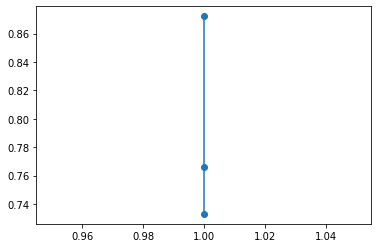

Min: 0.7329545454545454, Mean:0.7662878787878785, Max:0.8721590909090909
El cromosoma del individuo mas apto fue:
Num_neurons: 11
Hidden_layers: 3
Num_epochs: 468
Learning_rate: 0.01
Momentum: 0.24
Fitness_train: 0.8522727272727273
Fitness: 0.8721590909090909


In [59]:
#***************************************Módulo principal********************************************
if __name__ == '__main__':
    #Línea que evita mostrar los warnings generados durante el entrenamiento de las redes neuronales.
    warnings.simplefilter("ignore", category=ConvergenceWarning)
    #Crea una carpeta para guardar los csv de las generaciones de la población en caso de no existir.
    if not os.path.exists('./Generations'):
        os.mkdir('./Generations')
        print("Se ha creado el directorio Generations")
    #Reinicio de los arreglos de minimos, medias y maximos.
    mins = []
    means = []
    maxs = []
    #Se corre el algoritmo genético.  
    genetics(population_size=20,n_selection=15,percentage_mutation=2)

##Implementacion de una Máquina de Vectores de Soporte

In [60]:
SupportVectorMachine = SVC()
scores = cross_val_score(SupportVectorMachine, X, np.ravel(y), cv=2)
scores


array([0.95170455, 0.92329545])

In [61]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.4)
SupportVectorMachine = SVC()
SupportVectorMachine.fit(x_train, y_train) 
y_pred_svm = SupportVectorMachine.predict(x_test)
evaluate(y_test, y_pred_svm)

[[200   0]
 [ 29  53]]
True positives: 53
True negatives: 200
False positives: 0
False negative: 29
Precision:0.8971631205673759%
Sensibilidad:64.63414634146342%
Especificidad:100.0%


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0.8971631205673759, 64.63414634146342, 100.0]

##Implementación de Random Forests

In [63]:
RandomForest = RandomForestClassifier(n_estimators = 5)
scores = cross_val_score(RandomForest, X, np.ravel(y), cv=2)
scores


array([1., 1.])

In [62]:
RandomForest = RandomForestClassifier(n_estimators = 5)
RandomForest.fit(x_train, y_train)
y_pred_rfc = RandomForest.predict(x_test)
evaluate(y_test, y_pred_rfc)

[[200   0]
 [  0  82]]
True positives: 82
True negatives: 200
False positives: 0
False negative: 0
Precision:1.0%
Sensibilidad:100.0%
Especificidad:100.0%


<ipython-input-62-3ee9cb7082e0>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandomForest.fit(x_train, y_train)


[1.0, 100.0, 100.0]